### CS329E Term Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

Cleaning and preparing data

In [3]:
# Load Dataset with column names

column_names = [
    'ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1','symmetry1', 'fractal_dimension_1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2','symmetry2', 'fractal_dimension_2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3','symmetry3', 'fractal_dimension_3']
df = pd.read_csv('wdbc.csv', names=column_names, header=None)
df = df.drop('ID', axis=1)
df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension_3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# In diagnosis (target) column, display 1 if malignant and 0 if benign
df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0
df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
df['Diagnosis'] = df['Diagnosis'].astype(int)

X = df.drop('Diagnosis', axis=1)        # Features
y = df['Diagnosis']                     # Target

In [5]:
# Display a summary of feature statistics
stats_summary = pd.DataFrame({
    'Mean': X.mean(),
    'Median': X.median(),
    'Std Dev': X.std(),
    'Min': X.min(),
    'Max': X.max(),
    'Q1 (25%)': X.quantile(0.25),
    'Q3 (75%)': X.quantile(0.75),
    'Range': X.max() - X.min(),
    'IQR': X.quantile(0.75) - X.quantile(0.25),
    'Skewness': X.skew(),
    'Kurtosis': X.kurtosis()
})

stats_summary = stats_summary.round(4)

print("="*80)
print("COMPREHENSIVE FEATURE STATISTICS SUMMARY")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} samples, {X.shape[1]} features")
print(f"\nClass Distribution:")
print(df['Diagnosis'].value_counts())
print("\n" + "="*80)
print("\nDETAILED STATISTICS FOR EACH FEATURE:")
print("="*80)
print(stats_summary.to_string())


COMPREHENSIVE FEATURE STATISTICS SUMMARY

Dataset Shape: 569 samples, 30 features

Class Distribution:
Diagnosis
0    357
1    212
Name: count, dtype: int64


DETAILED STATISTICS FOR EACH FEATURE:
                         Mean    Median   Std Dev       Min        Max  Q1 (25%)   Q3 (75%)      Range       IQR  Skewness  Kurtosis
radius1               14.1273   13.3700    3.5240    6.9810    28.1100   11.7000    15.7800    21.1290    4.0800    0.9424    0.8455
texture1              19.2896   18.8400    4.3010    9.7100    39.2800   16.1700    21.8000    29.5700    5.6300    0.6504    0.7583
perimeter1            91.9690   86.2400   24.2990   43.7900   188.5000   75.1700   104.1000   144.7100   28.9300    0.9907    0.9722
area1                654.8891  551.1000  351.9141  143.5000  2501.0000  420.3000   782.7000  2357.5000  362.4000    1.6457    3.6523
smoothness1            0.0964    0.0959    0.0141    0.0526     0.1634    0.0864     0.1053     0.1108    0.0189    0.4563    0.8560
compa

### Distributions for each feature

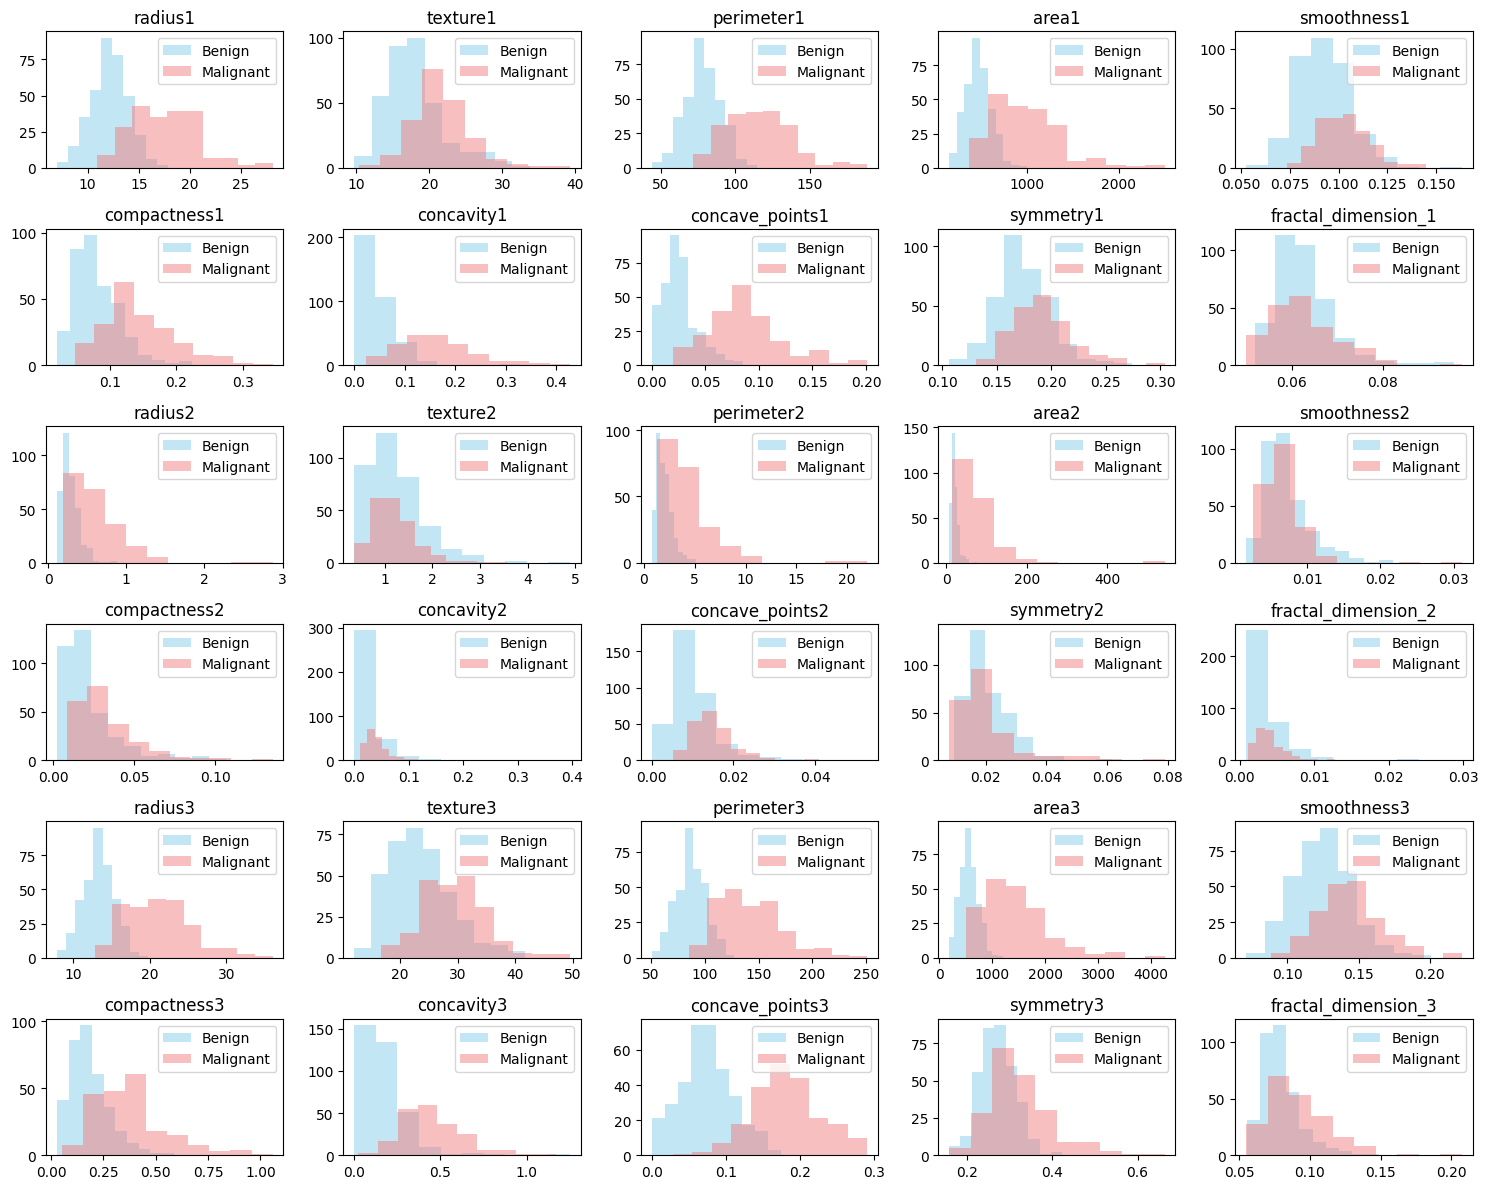

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 12))
axes = axes.flatten()
i = 0

for col in X.columns:
    ben = X[col][y == 0]
    mal = X[col][y == 1]

    axes[i].hist(ben, color='skyblue', alpha = 0.5, label='Benign')
    axes[i].hist(mal, color='lightcoral', alpha = 0.5, label='Malignant')
    axes[i].set_title(col)
    axes[i].legend()
    i += 1

plt.tight_layout()
plt.show()

### Splitting and scaling data

In [5]:
def split_scale(X, y, state):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test    

# Logistic Regression Model 
### Using Accuracy, Confusion Matrix, Classification Report, and ROC & AUC

In [6]:
def log_reg(X, y, state):
    # Split and scale data
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X, y, state)
    
    # Building Logistic Regression Model with scaled data
    logRegModel = LogisticRegression(max_iter=1000, random_state=42)
    logRegModel.fit(X_train_scaled, y_train)

    # Predict target values
    y_pred = logRegModel.predict(X_test_scaled)

    # Predict probablilities
    y_prob = logRegModel.predict_proba(X_test_scaled)[:, 1]

    return y_test, y_pred, y_prob

Accuracy: 0.9824561403508771

[[106   2]
 [  1  62]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



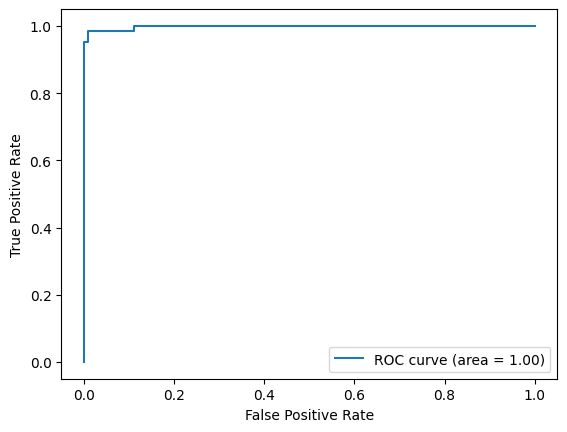

In [7]:
# Run logistic regression model
y_test, y_pred, y_prob = log_reg(X, y, 42)

# Calculate the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

# Displaying the classification report
print(classification_report(y_test, y_pred, zero_division=0))

# Displaying the ROC curve and AUC
#y_prob = logRegModel.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Random Forest Classifier

In [8]:
def rand_forest(X, y, state):
    # Split and scale data
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X, y, state)

    # Build random forest classifier model
    rfModel = RandomForestClassifier(n_estimators=100, random_state=42)
    rfModel.fit(X_train_scaled,  y_train)

    # Predict target values
    y_pred = rfModel.predict(X_test_scaled)

    # predict probabilities
    y_prob = rfModel.predict_proba(X_test_scaled)[:, 1]

    return y_test, y_pred, y_prob


Accuracy: 0.9707602339181286

[[107   1]
 [  4  59]]

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



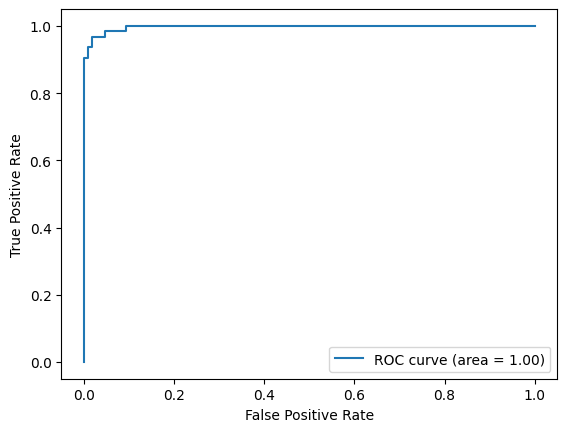

In [9]:
y_test, y_pred, y_prob = rand_forest(X,y,42)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(classification_report(y_test, y_pred, zero_division=0))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# AdaBoostClassifier

In [10]:
def adaBoost(X, y, state):
    # Split and scale data
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X, y, state)

    # Build AdaBoost model
    adaModel = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
    adaModel.fit(X_train_scaled, y_train)

    # predict target
    y_pred = adaModel.predict(X_test_scaled)

    # predict probability
    y_prob = adaModel.predict_proba(X_test_scaled)[:, 1]

    return y_test, y_pred, y_prob



Accuracy: 0.9707602339181286

[[104   4]
 [  1  62]]

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



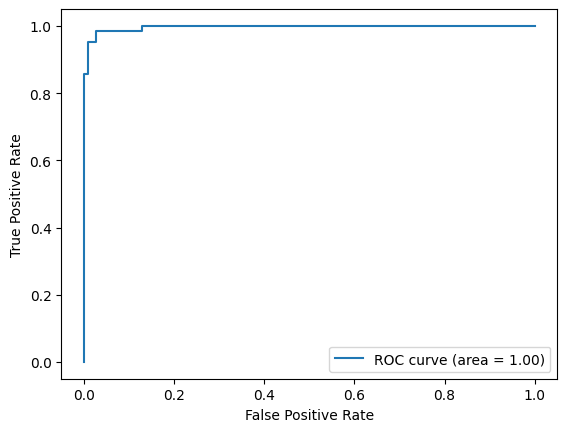

In [11]:
y_test, y_pred, y_prob = adaBoost(X, y, 42)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(classification_report(y_test, y_pred, zero_division=0))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Support Vector Machine

In [12]:
def sup_vec_machine(X, y, state):
    # Split and scale data
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X, y, state)

    # Build support vector machine model
    svmModel = svm.SVC(kernel='linear', probability=True, random_state=state)
    svmModel.fit(X_train_scaled, y_train)

    # predict target values
    y_pred = svmModel.predict(X_test_scaled)

    y_prob = svmModel.predict_proba(X_test_scaled)[:, 1]

    return y_test, y_pred, y_prob    


Accuracy: 0.9766081871345029

[[106   2]
 [  2  61]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



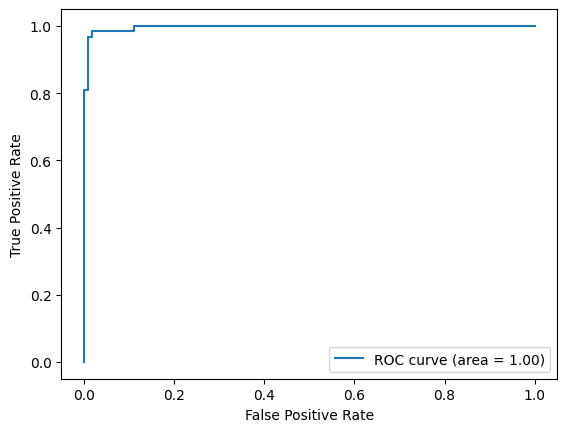

In [13]:
y_test, y_pred, y_prob = sup_vec_machine(X, y, 42)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(classification_report(y_test, y_pred, zero_division=0))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature Selection for Supervised Learning
### choosing a relevant subset of input features for more accuracy 

Dropping 10 highly correlated features: ['perimeter1', 'area1', 'concave_points1', 'perimeter2', 'area2', 'radius3', 'texture3', 'perimeter3', 'area3', 'concave_points3']

Final 10 features selected by RFE:
['radius1', 'texture1', 'concavity1', 'radius2', 'concave_points2', 'symmetry2', 'fractal_dimension_2', 'smoothness3', 'concavity3', 'symmetry3']


MODEL: Logistic Regression
Accuracy: 0.9766

Confusion Matrix:
[[105   3]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



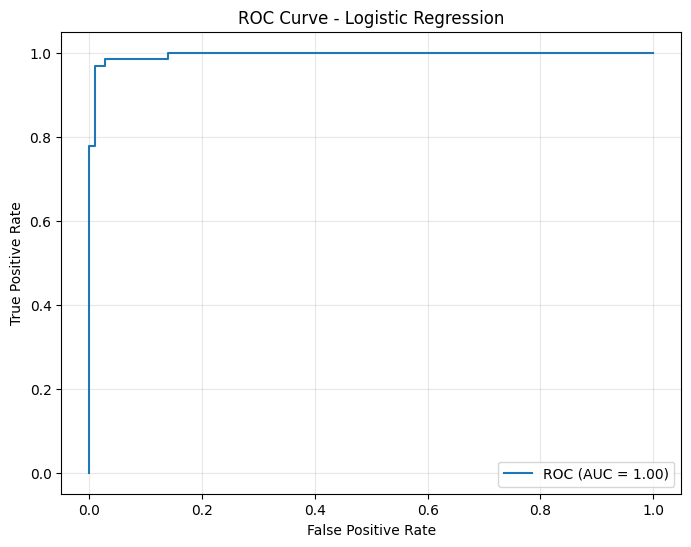




MODEL: Random Forest
Accuracy: 0.9708

Confusion Matrix:
[[106   2]
 [  3  60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



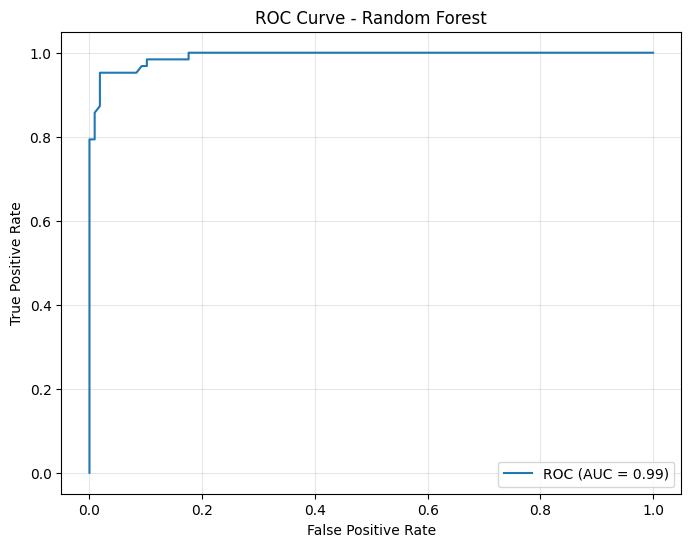




MODEL: AdaBoost
Accuracy: 0.9766

Confusion Matrix:
[[105   3]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



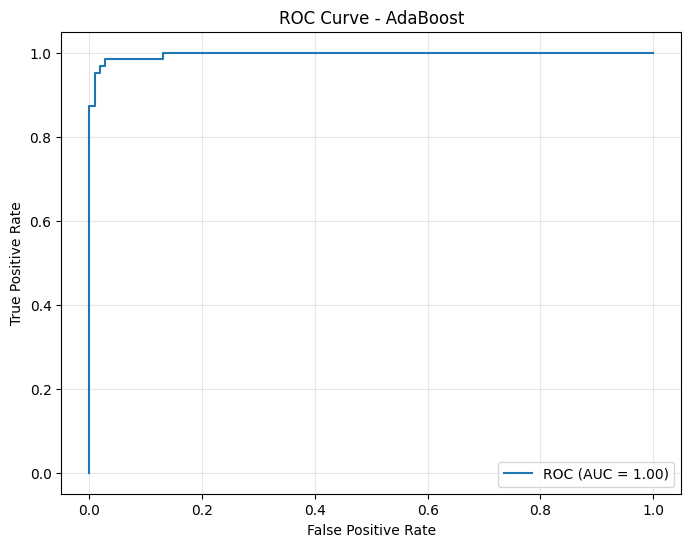




MODEL: SVM
Accuracy: 0.9766

Confusion Matrix:
[[105   3]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



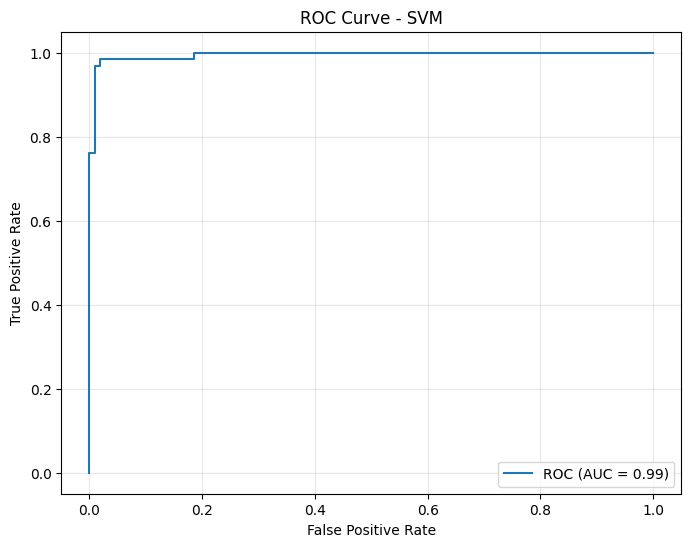

In [16]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rand_forest,
    "AdaBoost": adaBoost,
    "SVM": sup_vec_machine
}

# Scale and Split Data
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X, y, 42)

X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

correlation_matrix = X_train_df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

print(f"Dropping {len(to_drop)} highly correlated features: {to_drop}")

X_train_reduced = X_train_df.drop(to_drop, axis=1)
X_test_reduced = X_test_df.drop(to_drop, axis=1)

rfe_selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10)
X_train_final = rfe_selector.fit_transform(X_train_reduced, y_train)
X_test_final = rfe_selector.transform(X_test_reduced)

selected_features = X_train_reduced.columns[rfe_selector.support_].tolist()
print(f"\nFinal {len(selected_features)} features selected by RFE:")
print(selected_features)
print("\n")

X_final = X[selected_features]

for name, function in models.items():
    print("="*70)
    print(f"MODEL: {name}")
    print("="*70)

    y_test, y_pred, y_prob = function(X_final, y, 42)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}\n")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    print("\n\n")


# Comparing the accuracy of our different models with and without feature selection

In [76]:
num_iter = 200

logreg_acc = np.zeros(num_iter)
randfor_acc = np.zeros(num_iter)
adaboost_acc = np.zeros(num_iter)
svm_acc = np.zeros(num_iter)

for i in range(num_iter):
    # set random state for current iteration
    state = i

    # Logistic regression
    y_test_log, y_pred_log, y_prob_log = log_reg(X, y, state)
    logreg_acc[i] = accuracy_score(y_test_log, y_pred_log)

    # Random forest classifier
    y_test_rf, y_pred_rf, y_prob_rf = rand_forest(X, y, state)
    randfor_acc[i] = accuracy_score(y_test_rf, y_pred_rf)

    # AdaBoost classifier
    y_test_ada, y_pred_ada, y_prob_ada = adaBoost(X, y, state)
    adaboost_acc[i] = accuracy_score(y_test_ada, y_pred_ada)

    # Support vector machine
    y_test_svm, y_pred_svm, y_prob_svm = sup_vec_machine(X, y, state)
    svm_acc[i] = accuracy_score(y_test_svm, y_pred_svm)

### Logistic Regression Model

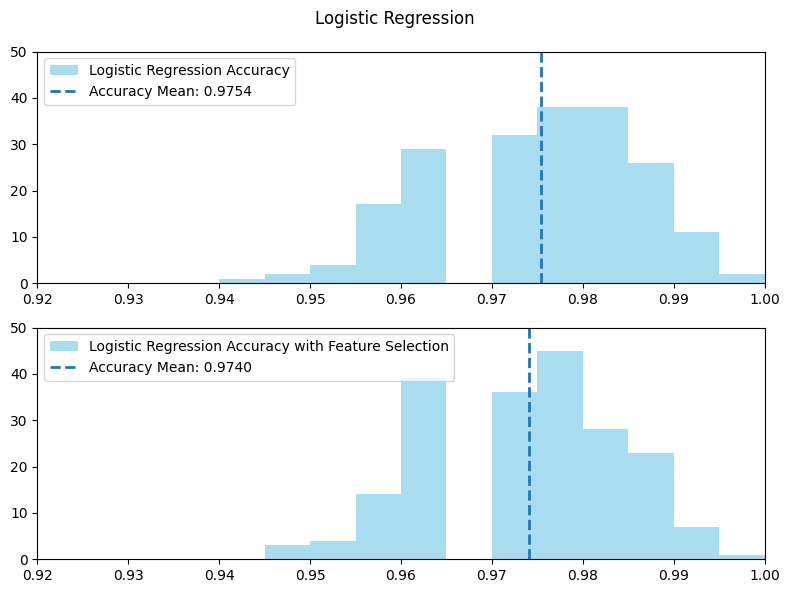

In [27]:
num_iter = 200

logreg_acc = np.zeros(num_iter)
logreg_acc_fs = np.zeros(num_iter)

X_fs = X[selected_features]

for i in range(num_iter):
    state = i

    # Without feature selection
    y_test_log, y_pred_log, y_prob_log = log_reg(X, y, state)
    logreg_acc[i] = accuracy_score(y_test_log, y_pred_log)

    # With feature selection
    y_test_log_fs, y_pred_log_fs, y_prob_log_fs = log_reg(X_fs, y, state)
    logreg_acc_fs[i] = accuracy_score(y_test_log_fs, y_pred_log_fs)

custom_bins = [0] + list(np.arange(0.92, 1.005, 0.005))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
axes = axes.flatten()


axes[0].hist(logreg_acc, bins=custom_bins, color='skyblue', alpha=0.7, label="Logistic Regression Accuracy")
axes[0].axvline(np.mean(logreg_acc), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(logreg_acc):.4f}')
axes[0].legend()
axes[0].set_xlim(0.92,1.0)
axes[0].set_ylim(0,50)

axes[1].hist(logreg_acc_fs, bins=custom_bins, color='skyblue', alpha=0.7, label="Logistic Regression Accuracy with Feature Selection")
axes[1].axvline(np.mean(logreg_acc_fs), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(logreg_acc_fs):.4f}')
axes[1].legend()
axes[1].set_xlim(0.92,1.0)
axes[1].set_ylim(0,50)

plt.suptitle("Logistic Regression")
plt.tight_layout()
plt.show()

### Random Forest Classifier

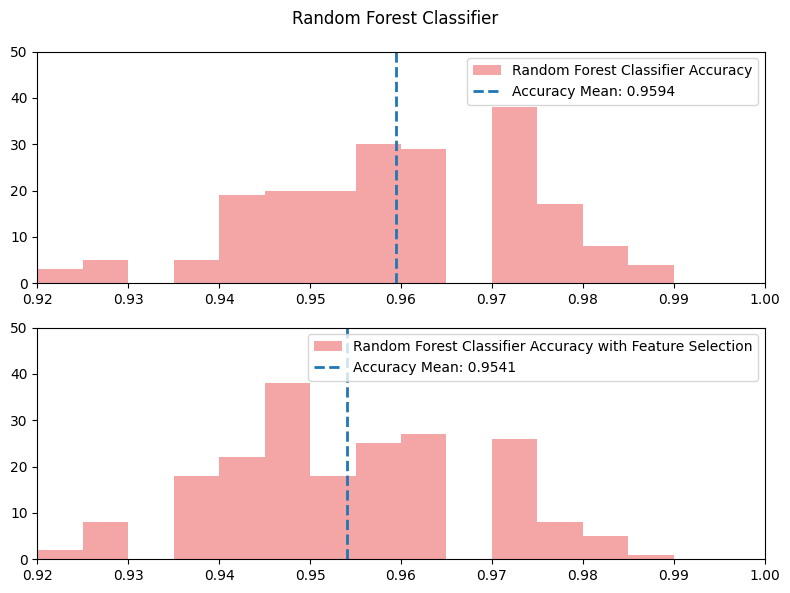

In [30]:
randfor_acc = np.zeros(num_iter)
randfor_acc_fs = np.zeros(num_iter)

for i in range(num_iter):
    state = i

    # Without feature selection
    y_test_rf, y_pred_rf, y_prob_rf = rand_forest(X, y, state)
    randfor_acc[i] = accuracy_score(y_test_rf, y_pred_rf)

    # With feature selection
    y_test_rf_fs, y_pred_rf_fs, y_prob_rf_fs = rand_forest(X_fs, y, state)
    randfor_acc_fs[i] = accuracy_score(y_test_rf_fs, y_pred_rf_fs)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
axes = axes.flatten()


axes[0].hist(randfor_acc, bins=custom_bins, color='lightcoral', alpha=0.7, label="Random Forest Classifier Accuracy")
axes[0].axvline(np.mean(randfor_acc), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(randfor_acc):.4f}')
axes[0].legend()
axes[0].set_xlim(0.92,1.0)
axes[0].set_ylim(0,50)

axes[1].hist(randfor_acc_fs, bins=custom_bins, color='lightcoral', alpha=0.7, label="Random Forest Classifier Accuracy with Feature Selection")
axes[1].axvline(np.mean(randfor_acc_fs), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(randfor_acc_fs):.4f}')
axes[1].legend()
axes[1].set_xlim(0.92,1.0)
axes[1].set_ylim(0,50)

plt.suptitle("Random Forest Classifier")
plt.tight_layout()
plt.show()

### AdaBoost Classifier

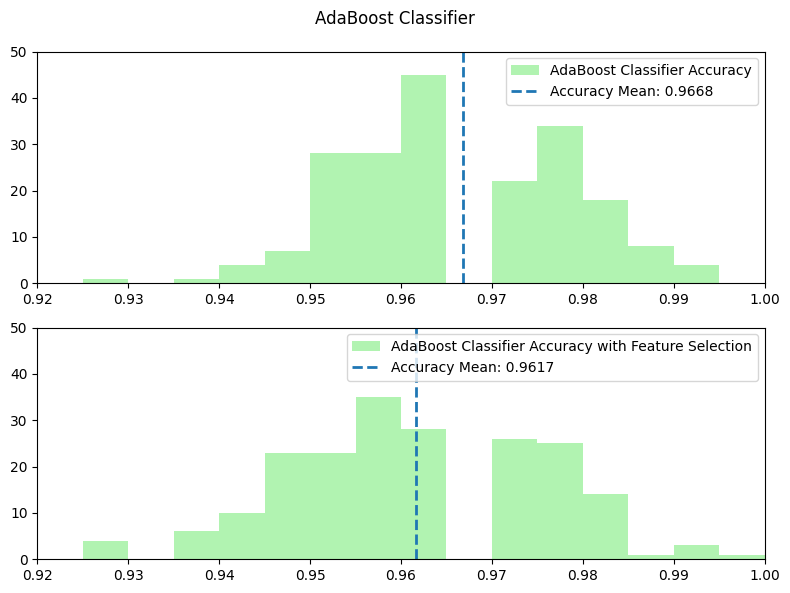

In [31]:
ab_acc = np.zeros(num_iter)
ab_acc_fs = np.zeros(num_iter)

for i in range(num_iter):
    state = i

    # Without feature selection
    y_test_ab, y_pred_ab, y_prob_ab = adaBoost(X, y, state)
    ab_acc[i] = accuracy_score(y_test_ab, y_pred_ab)

    # With feature selection
    y_test_ab_fs, y_pred_ab_fs, y_prob_ab_fs = adaBoost(X_fs, y, state)
    ab_acc_fs[i] = accuracy_score(y_test_ab_fs, y_pred_ab_fs)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
axes = axes.flatten()

axes[0].hist(ab_acc, bins=custom_bins, color='lightgreen', alpha=0.7, label="AdaBoost Classifier Accuracy")
axes[0].axvline(np.mean(ab_acc), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(ab_acc):.4f}')
axes[0].legend()
axes[0].set_xlim(0.92,1.0)
axes[0].set_ylim(0,50)

axes[1].hist(ab_acc_fs, bins=custom_bins, color='lightgreen', alpha=0.7, label="AdaBoost Classifier Accuracy with Feature Selection")
axes[1].axvline(np.mean(ab_acc_fs), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(ab_acc_fs):.4f}')
axes[1].legend()
axes[1].set_xlim(0.92,1.0)
axes[1].set_ylim(0,50)

plt.suptitle("AdaBoost Classifier")
plt.tight_layout()
plt.show()

### Support Vector Machine

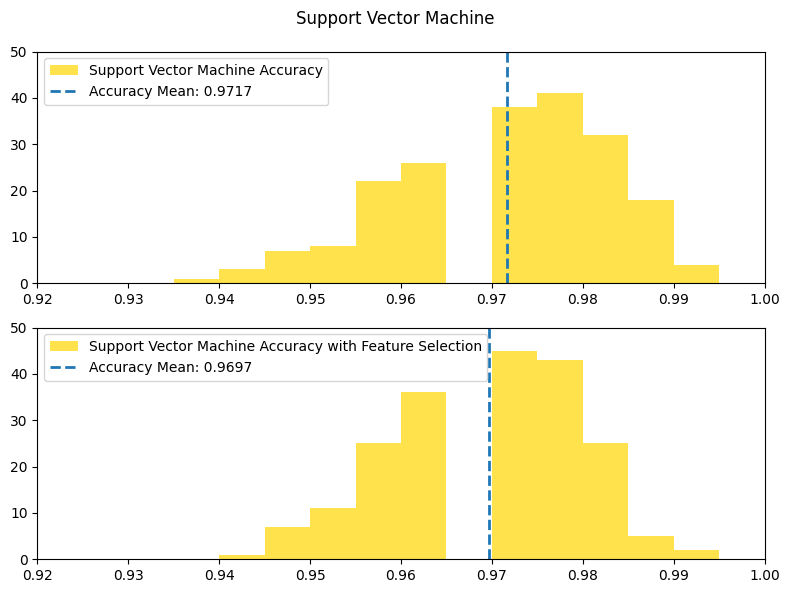

In [32]:
svm_acc = np.zeros(num_iter)
svm_acc_fs = np.zeros(num_iter)

for i in range(num_iter):
    state = i

    # Without feature selection
    y_test_svm, y_pred_svm, y_prob_smv = sup_vec_machine(X, y, state)
    svm_acc[i] = accuracy_score(y_test_svm, y_pred_svm)

    # With feature selection
    y_test_svm_fs, y_pred_svm_fs, y_prob_svm_fs = sup_vec_machine(X_fs, y, state)
    svm_acc_fs[i] = accuracy_score(y_test_svm_fs, y_pred_svm_fs)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
axes = axes.flatten()

axes[0].hist(svm_acc, bins=custom_bins, color='gold', alpha=0.7, label="Support Vector Machine Accuracy")
axes[0].axvline(np.mean(svm_acc), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(svm_acc):.4f}')
axes[0].legend()
axes[0].set_xlim(0.92,1.0)
axes[0].set_ylim(0,50)

axes[1].hist(svm_acc_fs, bins=custom_bins, color='gold', alpha=0.7, label="Support Vector Machine Accuracy with Feature Selection")
axes[1].axvline(np.mean(svm_acc_fs), linestyle='dashed', linewidth=2, label=f'Accuracy Mean: {np.mean(svm_acc_fs):.4f}')
axes[1].legend()
axes[1].set_xlim(0.92,1.0)
axes[1].set_ylim(0,50)

plt.suptitle("Support Vector Machine")
plt.tight_layout()
plt.show()